# Using SDPR

### Imports for data generation and plotting

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Import System Dynamics Pattern Recognizer

In [2]:
import sdpr

In order to check the SDPR version:

In [3]:
sdpr.__version__

'1.1.2'

### Display all dynamic patterns

<code>diplay_all()</code> function diplays representative shapes, short names, and IDs of all dynamic patterns that are recognized by SDPR.

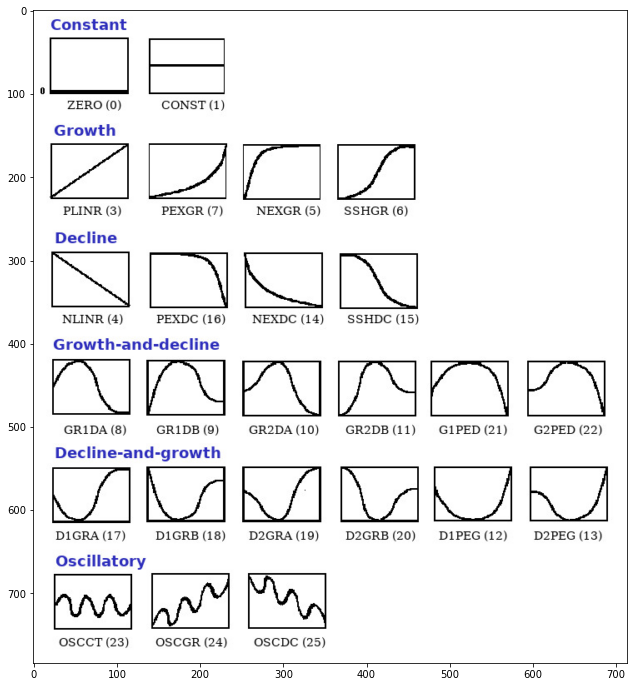

In [4]:
sdpr.display_all()

### Create classifier object

In [5]:
classifier = sdpr.Classifier.create()

# classifier = sdpr.Classifier() creates a blank classifier with
# no models in it. So, don't use it.

<code>get_model_id()</code> method displays the version of the classifier model file:

In [6]:
classifier.get_model_id()

'20200425124357'

## Classification

Simulation outputs to be classifed using SDPR must first be transfered to the Python environment as NumPy arrays (or Pandas dataframes which are based on NumPy arrays). 

Here, instead, we generate synthetic data for demonstration purposes.

#### Exampe 1: Oscillatory pattern with positive slope

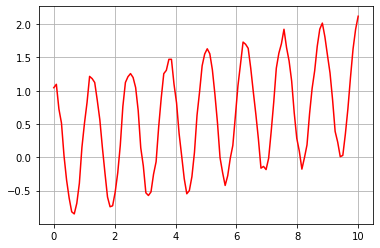

In [7]:
# Create oscillation using cos function
t = np.linspace(0,10,120)
y = np.cos(t/0.2)

# Add positive slope
y = y + t/10

# Add a noise term
np.random.seed(5)
y = y + np.random.rand(120)*.2

plt.plot(t, y, 'r')
plt.grid()

### Prediction

In [8]:
predicted_class = classifier.predict(y)
predicted_class

<Pattern.OSCGR: 24>

<code>predicted_class</code> refers to a <code>sdpr.Pattern</code> object, which is a Python integer enumeration. Its name and value (class ID) can be reached as:

In [9]:
predicted_class.name

'OSCGR'

In [10]:
predicted_class.value

24

<code>pattern_info()</code> method displays information about a pattern class:

In [11]:
sdpr.pattern_info(predicted_class)

Pattern ID  :  24
Pattern Name:  OSCGR
Description :
Oscillation around linearly growing trend


#### Exampe 2: S-Shaped growth with mild noise

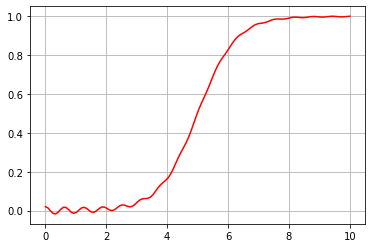

In [12]:
t = np.linspace(0,10,120)
k = 1.6
y = 1.0 / (1+np.exp(-k*(t-5.0)))
y = y + 0.02*np.exp(-t/4)*np.cos(t/0.1)
plt.plot(t, y, 'r')
plt.grid()

In [13]:
predicted_class = classifier.predict(y)
predicted_class

<Pattern.SSHGR: 6>

In [14]:
sdpr.pattern_info(predicted_class)

Pattern ID  :  6
Pattern Name:  SSHGR
Description :
S-shaped growth


### Classification table

Alternatively, it is possible to form a <code>ScoreTable</code> object, which contains likelihood scores for each pattern class.

In [15]:
table = classifier.calc_scores(y)

<code>print</code> function prints the table in a readable format:

In [16]:
print(table)

  NONE : -99.00     ZERO : -99.00     CONST: -99.00     PLINR: -37.26   
  NLINR: -52.50     NEXGR:  -7.94   * SSHGR:   0.54     PEXGR: -10.15   
  GR1DA: -12.99     GR1DB: -10.84     GR2DA:  -4.61     GR2DB:  -2.59   
  D1PEG:  -8.39     D2PEG:  -9.57     NEXDC: -12.91     SSHDC: -15.82   
  PEXDC: -16.34     D1GRA:  -1.08     D1GRB:  -2.85     D2GRA:  -0.97   
  D2GRB:  -4.83     G1PED:  -9.25     G2PED:  -2.91     OSCCT: -21.56   
  OSCGR: -21.56     OSCDC: -99.00   


<code>predicted()</code> method of the <code>ScoreTable</code> returns the predicted pattern from the table:

In [17]:
p = table.predicted()
p

<Pattern.SSHGR: 6>